# Proyecto final Coderhouse
Analisis de dataset de Santander
https://www.kaggle.com/datasets/lakshmi25npathi/santander-customer-transaction-prediction-dataset

In [35]:
import pandas as pd # Python library for data analysis and data frame
import numpy as np # Numerical Python library for linear algebra and computations
pd.set_option('display.max_columns', None) # code to display all columns
import heapq

# Visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from datetime import date, datetime # for manupulating time and date columns

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler # For handling categorical column and scaling numeric columns
from sklearn.decomposition import PCA
# Libraries for clustering and evaluation
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [2]:
#Read the file
df=pd.read_csv("train.csv", sep=",", index_col="ID_code")
df.head()

target    var_0   var_1    var_2   var_3    var_4   var_5   var_6  \
ID_code                                                                      
train_0       0   8.9255 -6.7863  11.9081  5.0930  11.4607 -9.2834  5.1187   
train_1       0  11.5006 -4.1473  13.8588  5.3890  12.3622  7.0433  5.6208   
train_2       0   8.6093 -2.7457  12.0805  7.8928  10.5825 -9.0837  6.9427   
train_3       0  11.0604 -2.1518   8.9522  7.1957  12.5846 -1.8361  5.8428   
train_4       0   9.8369 -1.4834  12.8746  6.6375  12.2772  2.4486  5.9405   

           var_7   var_8   var_9  var_10   var_11   var_12   var_13  var_14  \
ID_code                                                                       
train_0  18.6266 -4.9200  5.7470  2.9252   3.1821  14.0137   0.5745  8.7989   
train_1  16.5338  3.1468  8.0851 -0.4032   8.0585  14.0239   8.4135  5.4345   
train_2  14.6155 -4.9193  5.9525 -0.3249 -11.2648  14.1929   7.3124  7.5244   
train_3  14.9250 -5.8609  8.2450  2.3061   2.8102  13.8463  11.9704  6.4569   
train_4  19.2514  6.2654  7.6784 -9.4458 -12.1419  13.8481   7.8895  7.7894   

          var_15   var_16   var_17   var_18   var_19   var_20   var_21  \
ID_code                                                                  
train_0  14.5691   5.7487  -7.2393   4.2840  30.7133  10.5350  16.2191   
train_1  13.7003  13.8275 -15.5849   7.8000  28.5708   3.4287   2.7407   
train_2  14.6472   7.6782  -1.7395   4.7011  20.4775  17.7559  18.1377   
train_3  14.8372  10.7430  -0.4299  15.9426  13.7257  20.3010  12.5579   
train_4  15.0553   8.4871  -3.0680   6.5263  11.3152  21.4246  18.9608   

          var_22  var_23   var_24   var_25   var_26  var_27  var_28  var_29  \
ID_code                                                                       
train_0   2.5791  2.4716  14.3831  13.4325  -5.1488 -0.4073  4.9306  5.9965   
train_1   8.5524  3.3716   6.9779  13.8910 -11.7684 -2.5586  5.0464  0.5481   
train_2   1.2145  3.5137   5.6777  13.2177  -7.9940 -2.9029  5.8463  6.1439   
train_3   6.8202  2.7229  12.1354  13.7367   0.8135 -0.9059  5.9070  2.8407   
train_4  10.1102  2.7142  14.2080  13.5433   3.1736 -3.3423  5.9015  7.9352   

          var_30   var_31  var_32   var_33   var_34   var_35  var_36  var_37  \
ID_code                                                                        
train_0  -0.3085  12.9041 -3.8766  16.8911  11.1920  10.5785  0.6764  7.8871   
train_1  -9.2987   7.8755  1.2859  19.3710  11.3702   0.7399  2.7995  5.8434   
train_2 -11.1025  12.4858 -2.2871  19.0422  11.0449   4.1087  4.6974  6.9346   
train_3 -15.2398  10.4407 -2.5731   6.1796  10.6093  -5.9158  8.1723  2.8521   
train_4  -3.1582   9.4668 -0.0083  19.3239  12.4057   0.6329  2.7922  5.8184   

          var_38  var_39   var_40   var_41   var_42   var_43   var_44  \
ID_code                                                                 
train_0   4.6667  3.8743  -5.2387   7.3746  11.5767  12.0446  11.6418   
train_1  10.8160  3.6783 -11.1147   1.8730   9.8775  11.7842   1.2444   
train_2  10.8917  0.9003 -13.5174   2.2439  11.5283  12.0406   4.1006   
train_3   9.1738  0.6665  -3.8294  -1.0370  11.7770  11.2834   8.0485   
train_4  19.3038  1.4450  -5.5963  14.0685  11.9171  11.5111   6.9087   

          var_45   var_46   var_47   var_48   var_49   var_50   var_51  \
ID_code                                                                  
train_0  -7.0170   5.9226 -14.2136  16.0283   5.3253  12.9194  29.0460   
train_1 -47.3797   7.3718   0.1948  34.4014  25.7037  11.8343  13.2256   
train_2  -7.9078  11.1405  -5.7864  20.7477   6.8874  12.9143  19.5856   
train_3 -24.6840  12.7404 -35.1659   0.7613   8.3838  12.6832   9.5503   
train_4 -65.4863  13.8657   0.0444  -0.1346  14.4268  13.3273  10.4857   

         var_52  var_53  var_54   var_55   var_56  var_57  var_58   var_59  \
ID_code                                                                      
train_0 -0.6940  5.1736 -0.7474  14.8322  11.2668  5.3822  2.0183  10.1166   
train_1 -

In [3]:
#How long data is?
df.shape

(200000, 201)

In [4]:
#Take samples of the data
df.sample(10)

target    var_0   var_1    var_2   var_3    var_4    var_5  \
ID_code                                                                    
train_164720       1  12.7961  5.6683  12.9809  9.7980  14.5357   1.5072   
train_44081        0  14.9575  3.0490  10.1795  6.0908   9.5956  -1.4087   
train_195771       0  16.8559  1.6681  10.1448  8.7207   9.4005   4.0319   
train_19789        0  16.5718 -2.3032  14.8415  5.2538   9.7218   3.1791   
train_115474       0   8.8580 -4.8823  14.8733  4.7380  11.7148  -2.9160   
train_129782       0   8.7034 -3.2409  17.9699  4.4850   8.6422   2.8471   
train_125133       0  13.8633 -3.8744   8.8055  6.7320  12.3123   4.6914   
train_75418        1  13.8496 -3.6320  12.6021  8.5471   9.4596   4.5484   
train_73505        0   7.0943 -3.7270   8.4993  6.3653   9.3702   3.9864   
train_2472         0   9.5137 -0.2174  11.5127  5.6862  11.9527 -10.4391   

               var_6    var_7   var_8   var_9   var_10   var_11   var_12  \
ID_code                                                                    
train_164720  5.9096  16.8173 -4.0062  9.0523  -5.6714  -4.6387  13.9197   
train_44081   4.1955  15.4880  5.2936  7.5433  10.9498  -0.3300  14.0431   
train_195771  6.7553  13.3872  4.3366  7.7496   2.4763   1.6518  13.9210   
train_19789   3.3856  21.9610 -3.2193  6.6960   6.6918  -2.7792  14.1458   
train_115474  4.9682  18.0846  0.2312  6.5040   2.3372   0.1323  14.0204   
train_129782  5.6159  18.8526 -3.7356  7.6931  -1.6833   4.5361  13.9523   
train_125133  5.8506  18.7468 -1.2141  7.6571  -3.7534  -5.6681  14.0288   
train_75418   7.2625  21.4055  3.3150  5.4188   0.1903   5.7947  14.2527   
train_73505   6.5196  18.7971  1.6130  7.3894   5.8379 -14.3549  13.9314   
train_2472    5.4821  10.2285 -2.7502  7.4397  -8.3014  -5.6866  14.0934   

               var_13   var_14   var_15   var_16   var_17   var_18   var_19  \
ID_code                                                                       
train_164720  14.9143   6.8643  14.3437   8.6603   1.3649  20.8453  -0.6543   
train_44081    8.7847   7.8563  14.6222  11.9938  -5.8890  19.0054   9.8041   
train_195771  13.6949  10.3453  14.7564  12.5164 -13.1961  14.5153  13.5480   
train_19789    5.5863  11.6387  14.0066   6.7216  -7.6323  15.7609   8.8420   
train_115474   8.6676   6.5218  14.1924   8.2927  -5.9712  31.1251  -0.4079   
train_129782   2.7015   6.0834  14.6258  10.7434  -3.0866   7.9482   4.5150   
train_125133   4.5430   5.4641  14.2913  10.2930  -0.8940  18.1686   0.0388   
train_75418    3.7505   4.9352  14.8478   9.2873 -18.0819   7.5472  20.6057   
train_73505   13.5349   8.9465  14.9055   5.8352  -4.5928  15.8672  27.1233   
train_2472    14.2353   9.8996  13.8890   8.7217 -10.5487   8.7934   9.7007   

               var_20   var_21   var_22  var_23   var_24   var_25   var_26  \
ID_code                                                                      
train_164720  18.7569  32.2366   2.0948  3.4281   4.5273  13.9844   5.0283   
train_44081   11.2078  30.0210   3.0553  3.2707  15.8278  13.6135   0.3606   
train_195771   5.4193  15.2676   1.6356  3.5235  10.2960  13.6092 -13.5645   
train_19789   22.1944  26.5464   6.2826  2.2337   8.6536  13.1774  -5.7036   
train_115474  20.5311  14.2527   0.7318  2.7402   7.7943  13.8705 -12.2314   
train_129782  15.0485   5.2223   2.4159  2.9839  10.7066  13.6848  -1.7603   
train_125133  20.2717  33.6402   5.4294  4.1597  11.7539  13.5283  -4.2439   
train_75418    7.3811  27.9356  -0.2579  2.6595  11.4821  14.2543  11.5437   
train_73505   18.0943  14.8549   6.3497  2.4836   8.5649  13.4916   2.1037   
train_2472     8.5062   5.3527  12.0840  2.8787  15.0921  13.3371   6.2623   

              var_27  var_28  var_29   var_30   var_31  var_32   var_33  \
ID_code                                                                   
train_164720 -1.0783  4.6773  7.3585 -14.3357   9.9491 -4.4583   8.2197   
train_44081  -0.3416  5.7799  2.3918 -14.0504  10.2620  0.4887  12.5115   
tr

In [5]:
#Information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200000 entries, train_0 to train_199999
Columns: 201 entries, target to var_199
dtypes: float64(200), int64(1)
memory usage: 308.2+ MB


In [6]:
#Validate if there is null
r=df.isnull().sum()
for i in r:
    if i !=0:
        print(i)

In [7]:
#How data look like
df.describe()

target          var_0          var_1          var_2  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        0.100490      10.679914      -1.627622      10.715192   
std         0.300653       3.040051       4.050044       2.640894   
min         0.000000       0.408400     -15.043400       2.117100   
25%         0.000000       8.453850      -4.740025       8.722475   
50%         0.000000      10.524750      -1.608050      10.580000   
75%         0.000000      12.758200       1.358625      12.516700   
max         1.000000      20.315000      10.376800      19.353000   

               var_3          var_4          var_5          var_6  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        6.796529      11.078333      -5.065317       5.408949   
std         2.043319       1.623150       7.863267       0.866607   
min        -0.040200       5.074800     -32.562600       2.347300   
25%         5.254075       9.883175     -11.200350       4.767700   
50%         6.825000      11.108250      -4.833150       5.385100   
75%         8.324100      12.261125       0.924800       6.003000   
max        13.188300      16.671400      17.251600       8.447700   

               var_7          var_8          var_9         var_10  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean       16.545850       0.284162       7.567236       0.394340   
std         3.418076       3.332634       1.235070       5.500793   
min         5.349700     -10.505500       3.970500     -20.731300   
25%        13.943800      -2.317800       6.618800      -3.594950   
50%        16.456800       0.393700       7.629600       0.487300   
75%        19.102900       2.937900       8.584425       4.382925   
max        27.691800      10.151300      11.150600      18.670200   

              var_11         var_12         var_13         var_14  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean       -3.245596      14.023978       8.530232       7.537606   
std         5.970253       0.190059       4.639536       2.247908   
min       -26.095000      13.434600      -6.011100       1.013300   
25%        -7.510600      13.894000       5.072800       5.781875   
50%        -3.286950      14.025500       8.604250       7.520300   
75%         0.852825      14.164200      12.274775       9.270425   
max        17.188700      14.654500      22.331500      14.937700   

              var_15         var_16         var_17         var_18  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean       14.573126       9.333264      -5.696731      15.244013   
std         0.411711       2.557421       6.712612       7.851370   
min        13.076900       0.635100     -33.380200     -10.664200   
25%        14.262800       7.452275     -10.476225       9.177950   
50%        14.574100       9.232050      -5.666350      15.196250   
75%        14.874500      11.055900      -0.810775      21.013325   
max        15.863300      17.950600      19.025900      41.748000   

              var_19         var_20         var_21         var_22  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean       12.438567      13.290894      17.257883       4.305430   
std         7.996694       5.876254       8.196564       2.847958   
min       -12.402500      -5.432200     -10.089000      -5.322500   
25%         6.276475       8.627800      11.551000       2.182400   
50%        12.453900      13.196800      17.234250       4.275150   
75%        18.433300      17.879400      23.089050       6.293200   
max        35.183000      31.285900      49.044300      14.594500   

              var_23         var_24         var_25         var_26  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        3.019540      10.584400      13.667496      -4.055133   
std         0.526893       3.777245       0.285535       5.922210   
min   

In [8]:
#Is there any duplicate?
df.duplicated().sum()

0

In [9]:
#Validate types
df.dtypes

target       int64
var_0      float64
var_1      float64
var_2      float64
var_3      float64
            ...   
var_195    float64
var_196    float64
var_197    float64
var_198    float64
var_199    float64
Length: 201, dtype: object

#Drop unless values

In [47]:
df_values=df.drop("target", axis=1)
df_values

var_0   var_1    var_2   var_3    var_4    var_5   var_6  \
ID_code                                                                    
train_0        8.9255 -6.7863  11.9081  5.0930  11.4607  -9.2834  5.1187   
train_1       11.5006 -4.1473  13.8588  5.3890  12.3622   7.0433  5.6208   
train_2        8.6093 -2.7457  12.0805  7.8928  10.5825  -9.0837  6.9427   
train_3       11.0604 -2.1518   8.9522  7.1957  12.5846  -1.8361  5.8428   
train_4        9.8369 -1.4834  12.8746  6.6375  12.2772   2.4486  5.9405   
...               ...     ...      ...     ...      ...      ...     ...   
train_199995  11.4880 -0.4956   8.2622  3.5142  10.3404  11.6081  5.6709   
train_199996   4.9149 -2.4484  16.7052  6.6345   8.3096 -10.5628  5.8802   
train_199997  11.2232 -5.0518  10.5127  5.6456   9.3410  -5.4086  4.5555   
train_199998   9.7148 -8.6098  13.6104  5.7930  12.5173   0.5339  6.0479   
train_199999  10.8762 -5.7105  12.1183  8.0328  11.5577   0.3488  5.2839   

                var_7   var_8   var_9  var_10   var_11   var_12   var_13  \
ID_code                                                                    
train_0       18.6266 -4.9200  5.7470  2.9252   3.1821  14.0137   0.5745   
train_1       16.5338  3.1468  8.0851 -0.4032   8.0585  14.0239   8.4135   
train_2       14.6155 -4.9193  5.9525 -0.3249 -11.2648  14.1929   7.3124   
train_3       14.9250 -5.8609  8.2450  2.3061   2.8102  13.8463  11.9704   
train_4       19.2514  6.2654  7.6784 -9.4458 -12.1419  13.8481   7.8895   
...               ...     ...     ...     ...      ...      ...      ...   
train_199995  15.1516 -0.6209  5.6669  3.7574  -9.5348  13.9860   5.2982   
train_199996  21.5940 -3.6797  6.0019  6.5576 -11.8776  14.4131   3.3087   
train_199997  21.5571  0.1202  6.1629  4.4004  -0.4651  13.8775   9.7414   
train_199998  17.0152 -2.1926  8.7542  1.4245   0.7086  14.2110   6.5641   
train_199999  15.2058 -0.4541  9.3688 -7.3826  -8.7049  14.2486  15.0849   

               var_14   var_15   var_16   var_17   var_18   var_19   var_20  \
ID_code                                                                       
train_0        8.7989  14.5691   5.7487  -7.2393   4.2840  30.7133  10.5350   
train_1        5.4345  13.7003  13.8275 -15.5849   7.8000  28.5708   3.4287   
train_2        7.5244  14.6472   7.6782  -1.7395   4.7011  20.4775  17.7559   
train_3        6.4569  14.8372  10.7430  -0.4299  15.9426  13.7257  20.3010   
train_4        7.7894  15.0553   8.4871  -3.0680   6.5263  11.3152  21.4246   
...               ...      ...      ...      ...      ...      ...      ...   
train_199995   8.2705  14.1527   7.4540  -5.0105  12.0465   8.6349   9.9137   
train_199996   3.5800  14.1597   7.5191  -8.8715  17.9467  17.0237   6.6459   
train_199997  10.9044  14.5597   9.6214  -1.6429  23.1127  12.1517  16.2577   
train_199998   7.6177  13.8771   9.0479 -11.8164  14.0831  -2.0345  18.3863   
train_199999   5.2313  14.3572  12.5523  -6.5066  11.3592  11.4779  15.4997   

               var_21   var_22  var_23   var_24   var_25   var_26  var_27  \
ID_code                                                                     
train_0       16.2191   2.5791  2.4716  14.3831  13.4325  -5.1488 -0.4073   
train_1        2.7407   8.5524  3.3716   6.9779  13.8910 -11.7684 -2.5586   
train_2       18.1377   1.2145  3.5137   5.6777  13.2177  -7.9940 -2.9029   
train_3       12.5579   6.8202  2.7229  12.1354  13.7367   0.8135 -0.9059   
train_4       18.9608  10.1102  2.7142  14.2080  13.5433   3.1736 -3.3423   
...               ...      ...     ...      ...      ...      ...     ...   
train_199995  25.1376   1.0914  3.2326   7.7802  13.9939   2.9085  0.1005   
train_199996  18.2345   0.8982  2.2532  15.4977  13.3282   5.2281 -3.7424   
train_199997   3.1453   3.1008  2.1497  10.2715  13.5637   4.9473 -0.9905   
train_199998   3.0911   5.5803  3.7091  12.8219  13.8866  -3.3859 -0.4440   
train_199999   3.8474   2.4381  2.8295  10.6681  13.7167  -7.7771 -2.7798   

        

In [11]:
correlations=df.corr()
correlations

target     var_0     var_1     var_2     var_3     var_4     var_5  \
target   1.000000  0.052390  0.050343  0.055870  0.011055  0.010915  0.030979   
var_0    0.052390  1.000000 -0.000544  0.006573  0.003801  0.001326  0.003046   
var_1    0.050343 -0.000544  1.000000  0.003980  0.000010  0.000303 -0.000902   
var_2    0.055870  0.006573  0.003980  1.000000  0.001001  0.000723  0.001569   
var_3    0.011055  0.003801  0.000010  0.001001  1.000000 -0.000322  0.003253   
...           ...       ...       ...       ...       ...       ...       ...   
var_195  0.028285  0.002073 -0.000785 -0.001070  0.001206  0.003706 -0.001274   
var_196  0.023608  0.004386 -0.000377  0.003952 -0.002800  0.000513  0.002880   
var_197 -0.035303 -0.000753 -0.004157  0.001078  0.001164 -0.000046 -0.000535   
var_198 -0.053000 -0.005776 -0.004861 -0.000877 -0.001651 -0.001821 -0.000953   
var_199  0.025434  0.003850  0.002287  0.003855  0.000506 -0.000786  0.002767   

            var_6     var_7     var_8     var_9    var_10    var_11    var_12  \
target   0.066731 -0.003025  0.019584 -0.042805 -0.002213  0.022993 -0.069489   
var_0    0.006983  0.002429  0.004962 -0.002613  0.000355  0.003468 -0.001996   
var_1    0.003258  0.001511  0.004098 -0.000832  0.002875  0.004778 -0.001977   
var_2    0.000883 -0.000991  0.002648 -0.001932 -0.000474  0.005180 -0.003781   
var_3   -0.000774  0.002500  0.003553 -0.000826 -0.000897  0.000482 -0.001794   
...           ...       ...       ...       ...       ...       ...       ...   
var_195  0.001244  0.001854  0.001396 -0.000868 -0.000204 -0.000501  0.000721   
var_196  0.005378  0.001045 -0.003242  0.000052 -0.002243  0.006086 -0.002249   
var_197 -0.003565  0.003466 -0.004583  0.003701  0.002680 -0.005642  0.002946   
var_198 -0.003025  0.000650  0.002950  0.002343 -0.001546 -0.000968  0.007545   
var_199  0.006096 -0.001457  0.000854  0.001070 -0.003561  0.000037 -0.001016   

           var_13    var_14    var_15    var_16    var_17    var_18    var_19  \
target  -0.055156 -0.006332  0.017283  0.008117  0.000864  0.043479  0.011291   
var_0   -0.002717 -0.004584 -0.000043  0.001112 -0.001664  0.004292  0.001505   
var_1   -0.001303 -0.001544  0.004946 -0.002481 -0.001180  0.000289  0.001246   
var_2   -0.008795 -0.002627  0.004063  0.000102  0.000841  0.003529  0.001643   
var_3   -0.005717  0.000534  0.003093  0.003011  0.003618  0.000995 -0.000481   
...           ...       ...       ...       ...       ...       ...       ...   
var_195 -0.006739 -0.002081 -0.001442  0.003222 -0.000691  0.006409 -0.000721   
var_196 -0.001792  0.000639  0.001268 -0.000405 -0.001484  0.004927 -0.002899   
var_197 -0.004304  0.003843 -0.001167  0.001704 -0.000425 -0.003269 -0.000325   
var_198 -0.001896 -0.000571  0.000382  0.002018  0.001190 -0.004619  0.001284   
var_199 -0.003060 -0.004266  0.002613 -0.000637 -0.002404 -0.001419 -0.002175   

           var_20    var_21    var_22    var_23    var_24    var_25    var_26  \
target  -0.018329 -0.058483  0.060558 -0.025473  0.028477  0.013328  0.062422   
var_0   -0.000932  0.000781  0.002322 -0.000987  0.003658  0.001158  0.006117   
var_1   -0.002255 -0.001519  0.001762  0.003606  0.001417  0.000844  0.004778   
var_2    0.002162 -0.006885  0.000297  0.002280  0.001693 -0.000913  0.006138   
var_3    0.003385 -0.000037 -0.002905  0.001633 -0.002006 -0.002307  0.001946   
...           ...       ...       ...       ...       ...       ...       ...   
var_195  0.001853 -0.003916  0.001618 -0.001793  0.001365  0.000093  0.001488   
var_196  0.000531 -0.003316 -0.000147  0.000748  0.002193  0.000008  0.000300   
var_197  0.000335  0.002419  0.002285 -0.001586  0.004293  0.002041 -0.004430   
var_198  0.005043  0.001164 -0.005303  0.001267  0.001555 -0.001635 -0.005124   
var_199 -0.002770 -0.002598  0.003568  0.001140 -0.000527  0.001498  0.003651   

           var_27    var_28    var_29    var_30    var_31    var_32    var_33  \
target  -0.000582 -0.023942  0.004682 

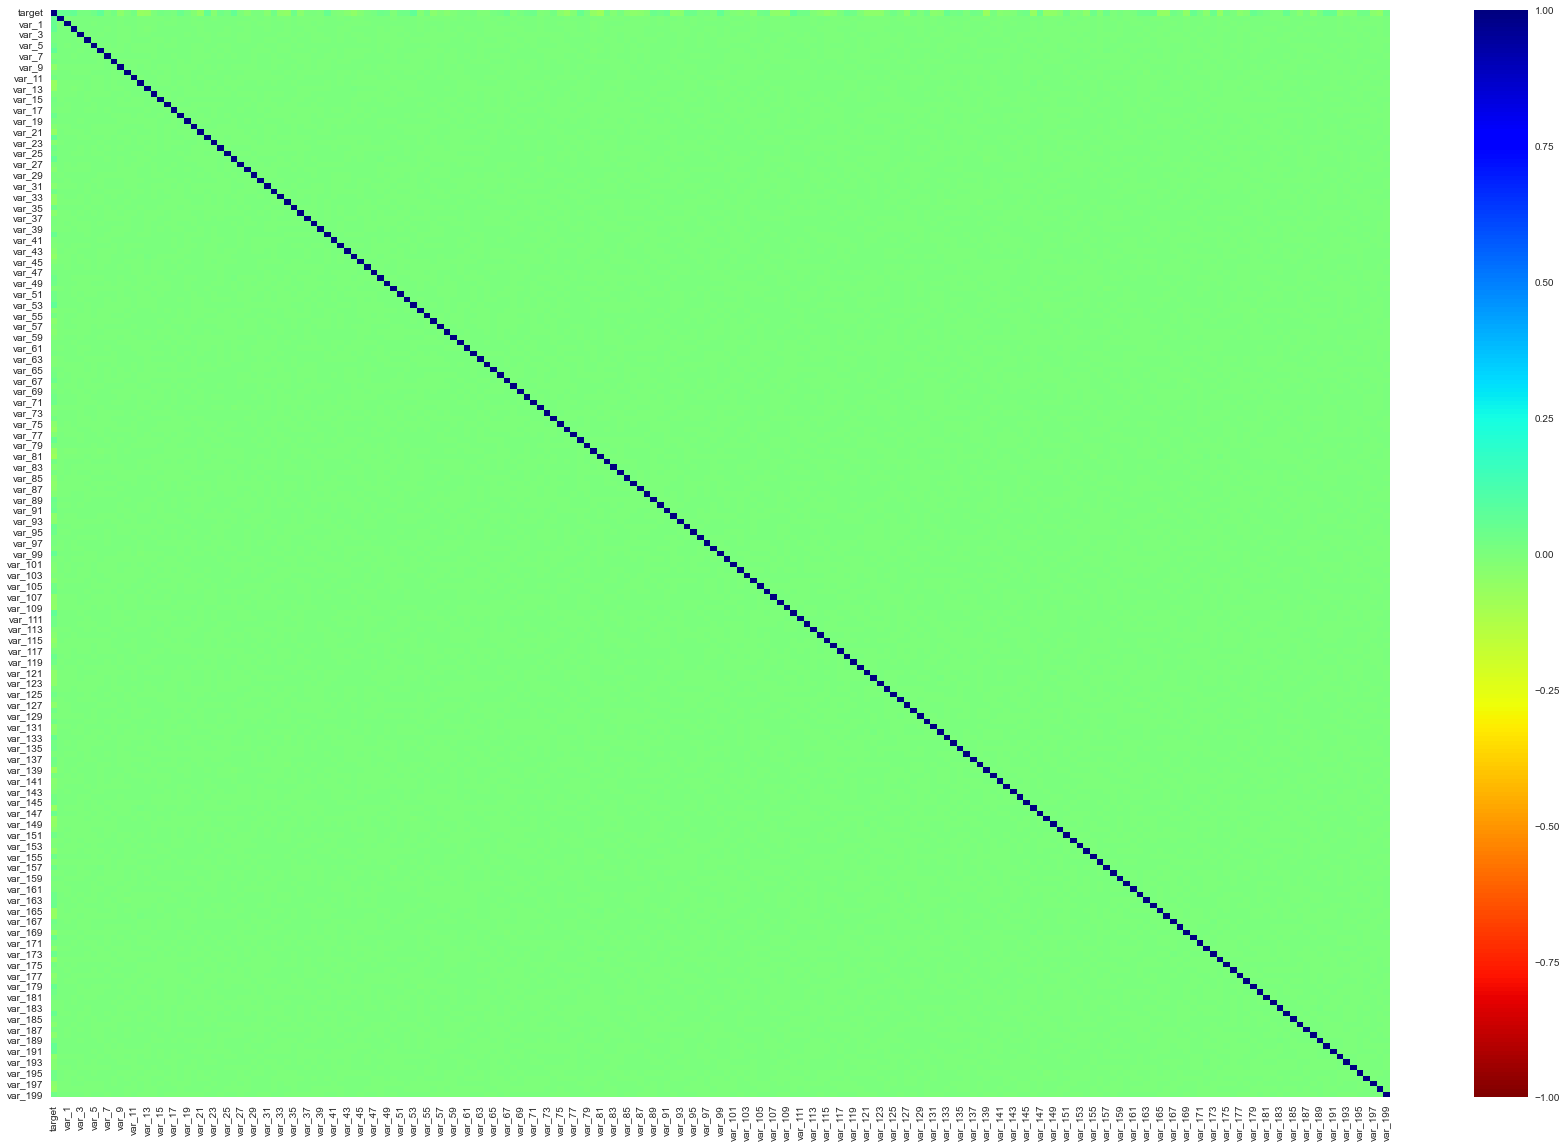

In [12]:
plt.figure(figsize=(30,20))
sns.heatmap(correlations, vmin=-1, vmax=1, cmap='jet_r')
plt.show()

# Analisis de outliers


In [13]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Analisis Univariado

### Comenzaré grafiando algunas variables al azar

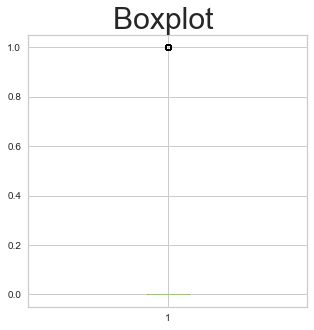

In [14]:
plt.figure(figsize=(5,5))
plt.boxplot(df["target"])
plt.title("Boxplot ", fontsize=30)
plt.show()

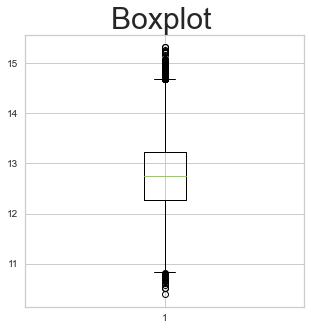

In [15]:
plt.figure(figsize=(5,5))
plt.boxplot(df["var_50"])
plt.title("Boxplot ", fontsize=30)
plt.show()

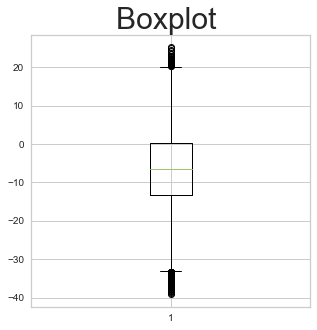

In [16]:
plt.figure(figsize=(5,5))
plt.boxplot(df["var_100"])
plt.title("Boxplot ", fontsize=30)
plt.show()

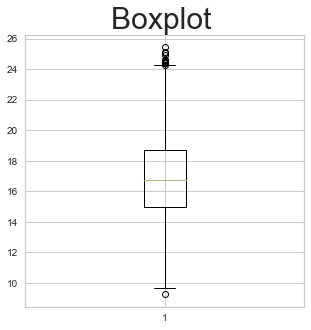

In [17]:
plt.figure(figsize=(5,5))
plt.boxplot(df["var_150"])
plt.title("Boxplot ", fontsize=30)
plt.show()

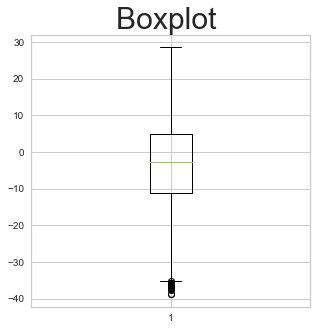

In [18]:
plt.figure(figsize=(5,5))
plt.boxplot(df["var_199"])
plt.title("Boxplot ", fontsize=30)
plt.show()

## Vemos que todos los boxplot realizados tienen outliers, se buscará las variables con mayor cantiadad de outliers para graficarlas. 
## Haremos el Analisis Interquartil

In [19]:
Q1=df.quantile(0.25) #Cuartil 25
Q3=df.quantile(0.75) #Cuartil 75
IQR=Q3-Q1

In [20]:
L_BOUND= Q1-1.5*IQR #limite inferiror
H_BOUND= Q3+1.5*IQR #limite superior

In [21]:
columns=list(df.columns)
lista=list(range(0,200)) #Genero lista para iterar

In [22]:
#Calculo los outliers por variable, y saco el indice del mayor
outliers=[]
max_value=-1
column=-1
for i in lista:
    a=len(df[(((df[columns[i]]) < L_BOUND[i])| ((df[columns[i]]) > H_BOUND[i]))])
    outliers.append(a)
    if max_value<a:
        max_value=a
        column=i

In [23]:
outliers.sort(reverse=True) #Ordeno para ver los mayores valores
outliers

[20098,
 1509,
 1208,
 889,
 804,
 733,
 637,
 589,
 572,
 502,
 498,
 470,
 465,
 461,
 446,
 432,
 413,
 401,
 397,
 397,
 383,
 353,
 331,
 325,
 323,
 313,
 309,
 289,
 286,
 279,
 275,
 268,
 263,
 254,
 254,
 251,
 241,
 239,
 233,
 231,
 228,
 222,
 221,
 198,
 193,
 190,
 188,
 187,
 186,
 178,
 177,
 177,
 176,
 172,
 169,
 163,
 162,
 158,
 154,
 152,
 152,
 150,
 148,
 146,
 145,
 144,
 132,
 131,
 131,
 129,
 128,
 125,
 122,
 113,
 109,
 107,
 104,
 104,
 96,
 96,
 95,
 94,
 92,
 90,
 88,
 85,
 84,
 80,
 80,
 76,
 70,
 68,
 66,
 58,
 56,
 53,
 51,
 49,
 49,
 48,
 47,
 43,
 43,
 42,
 41,
 41,
 40,
 39,
 39,
 38,
 38,
 37,
 36,
 35,
 34,
 34,
 32,
 30,
 30,
 28,
 27,
 27,
 27,
 24,
 23,
 23,
 23,
 22,
 22,
 22,
 22,
 22,
 19,
 17,
 17,
 16,
 15,
 15,
 15,
 15,
 15,
 15,
 14,
 13,
 12,
 11,
 11,
 10,
 9,
 8,
 7,
 7,
 6,
 6,
 6,
 6,
 6,
 5,
 5,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0

#### Obtengo indice de los tres primeros para graficar boxplot


In [24]:
max_0=outliers.index(20098)
max_1=outliers.index(1509)
max_2=outliers.index(1208)
print(max_0,max_1,max_2)

0 1 2


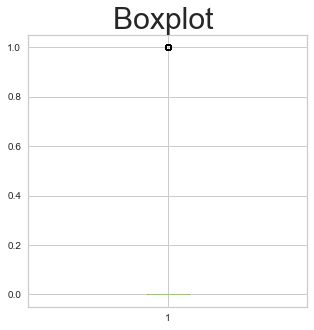

In [25]:
plt.figure(figsize=(5,5))
plt.boxplot(df["target"])
plt.title("Boxplot ", fontsize=30)
plt.show()

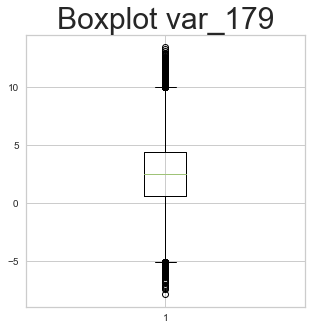

In [26]:
plt.figure(figsize=(5,5))
plt.boxplot(df["var_179"])
plt.title("Boxplot var_179", fontsize=30)
plt.show()

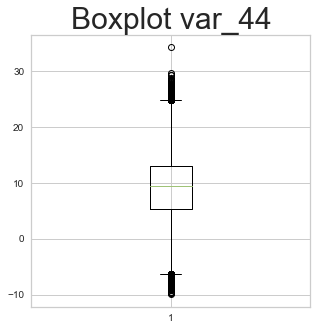

In [27]:
plt.figure(figsize=(5,5))
plt.boxplot(df["var_44"])
plt.title("Boxplot var_44", fontsize=30)
plt.show()

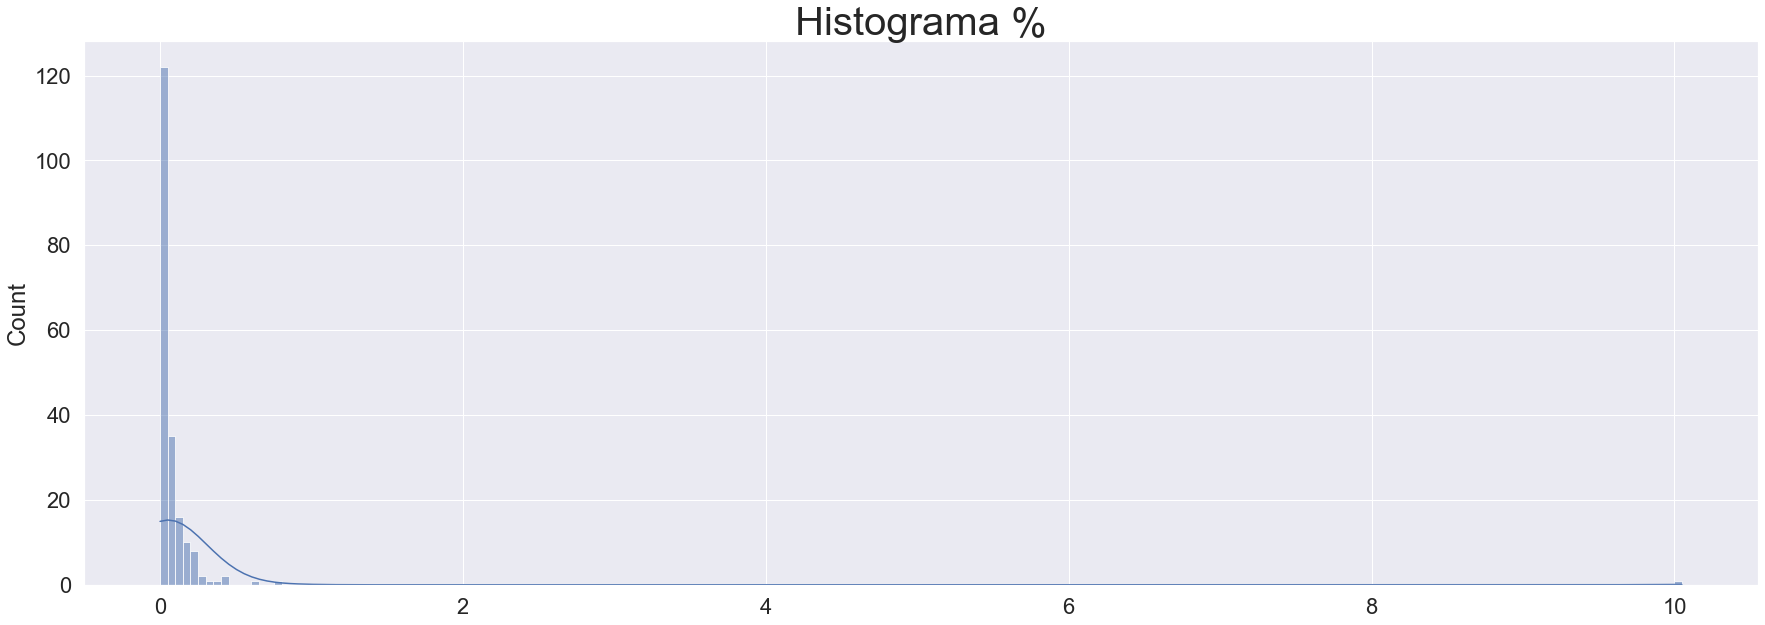

In [28]:
#Calculo el porcentaje de outliers por variable
per_out=[]
for i in outliers:
    per= i/2000
    per_out.append(per)
plt.figure(figsize=(30,10))
sns.set(font_scale = 2)
sns.histplot(per_out, bins=200, kde=True)
plt.title("Histograma %", fontsize=40)
plt.show()

### Se confirma que estas variables son las que más outliers tienen dentro del dataframe, es importante destacar que dentro de target las unicas variables que se encuentran son 0 y 1. Y tanto el Q1 como Q3 son 0 entonces sabemos que existen 20098 "1". Por ultimo, podemos apreciar que el porcentaje de outliers por variable es menor al 1% en la mayoría de ellas
###  Además, pasamos a calcular el máximo valor de outliers según analisis univariado para este caso. Sabiendo que si alguna fila coincide pueden ser menos valores 

In [29]:
sumatoria=0
for i in outliers: #Itero para hacer la sumatoria de outliers por variable
    sumatoria+=i
    
print("La cantidad maxima de outliers puede ser", sumatoria)
    

La cantidad maxima de outliers puede ser 46614


# # Analisis de simetria

In [30]:
df_asimetria=list(df.skew()) #Calculo simetria
print(heapq.nlargest(2,df_asimetria), heapq.nsmallest(2,df_asimetria) ) #Obtengo los extremos

[2.6576420477382454, 0.2674136233473473] [-0.34017215733706146, -0.2380906435475246]


In [31]:
#Busco los indices de cada uno
index_max0=df_asimetria.index(2.6576420477382454)
index_max1=df_asimetria.index(0.2674136233473473)
index_min0=df_asimetria.index(-0.34017215733706146)
index_min1=df_asimetria.index(-0.2380906435475246)
print(index_max0,index_max1,index_min0,index_min1)

0 169 45 94


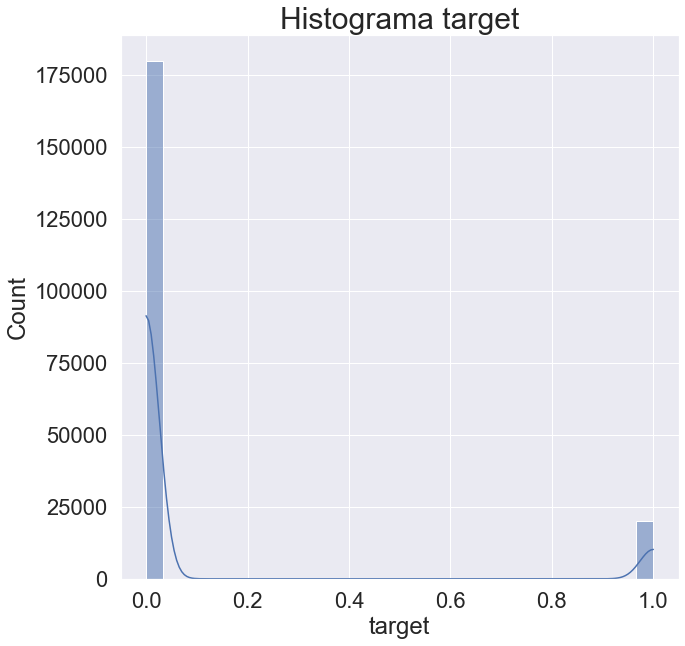

In [32]:
#Grafico histograma de target
plt.figure(figsize=(10,10))
sns.set(font_scale = 2)
sns.histplot(df["target"], bins=30, kde=True)
plt.title("Histograma target", fontsize=30)
plt.show()

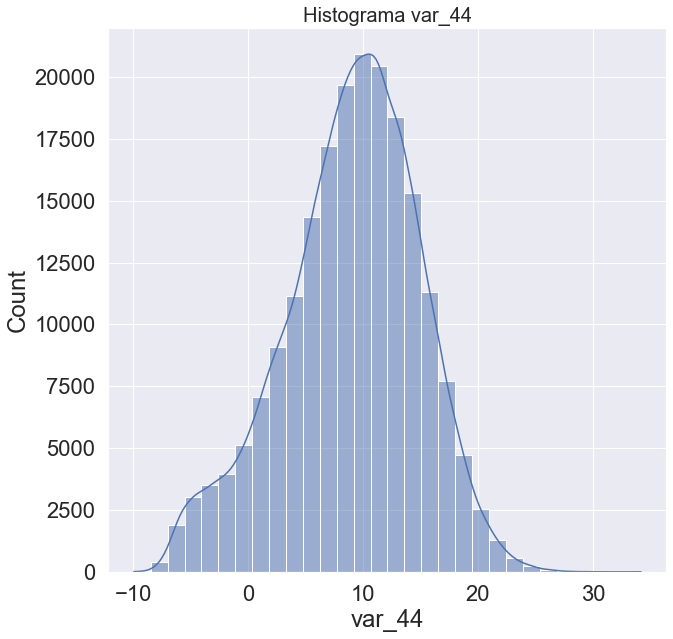

In [33]:
#Grafico histograma del que esta más cercano al extremo -0,34 que es 144
plt.figure(figsize=(10,10))
sns.set(font_scale = 2)
sns.histplot(df["var_44"], bins=30, kde=True)
plt.title("Histograma var_44", fontsize=20)
plt.show()

## Podemos validar que todas las variables son aproximadamente asímetrica ya que si sacamos target se encuentra entre -0.34 y 0.26.
## Además, podemos ver en el histograma anterior que es el "más" asimétrico el resutlado es bastante simétrico

Hacer pca y validar que las columnas sean todas distintas

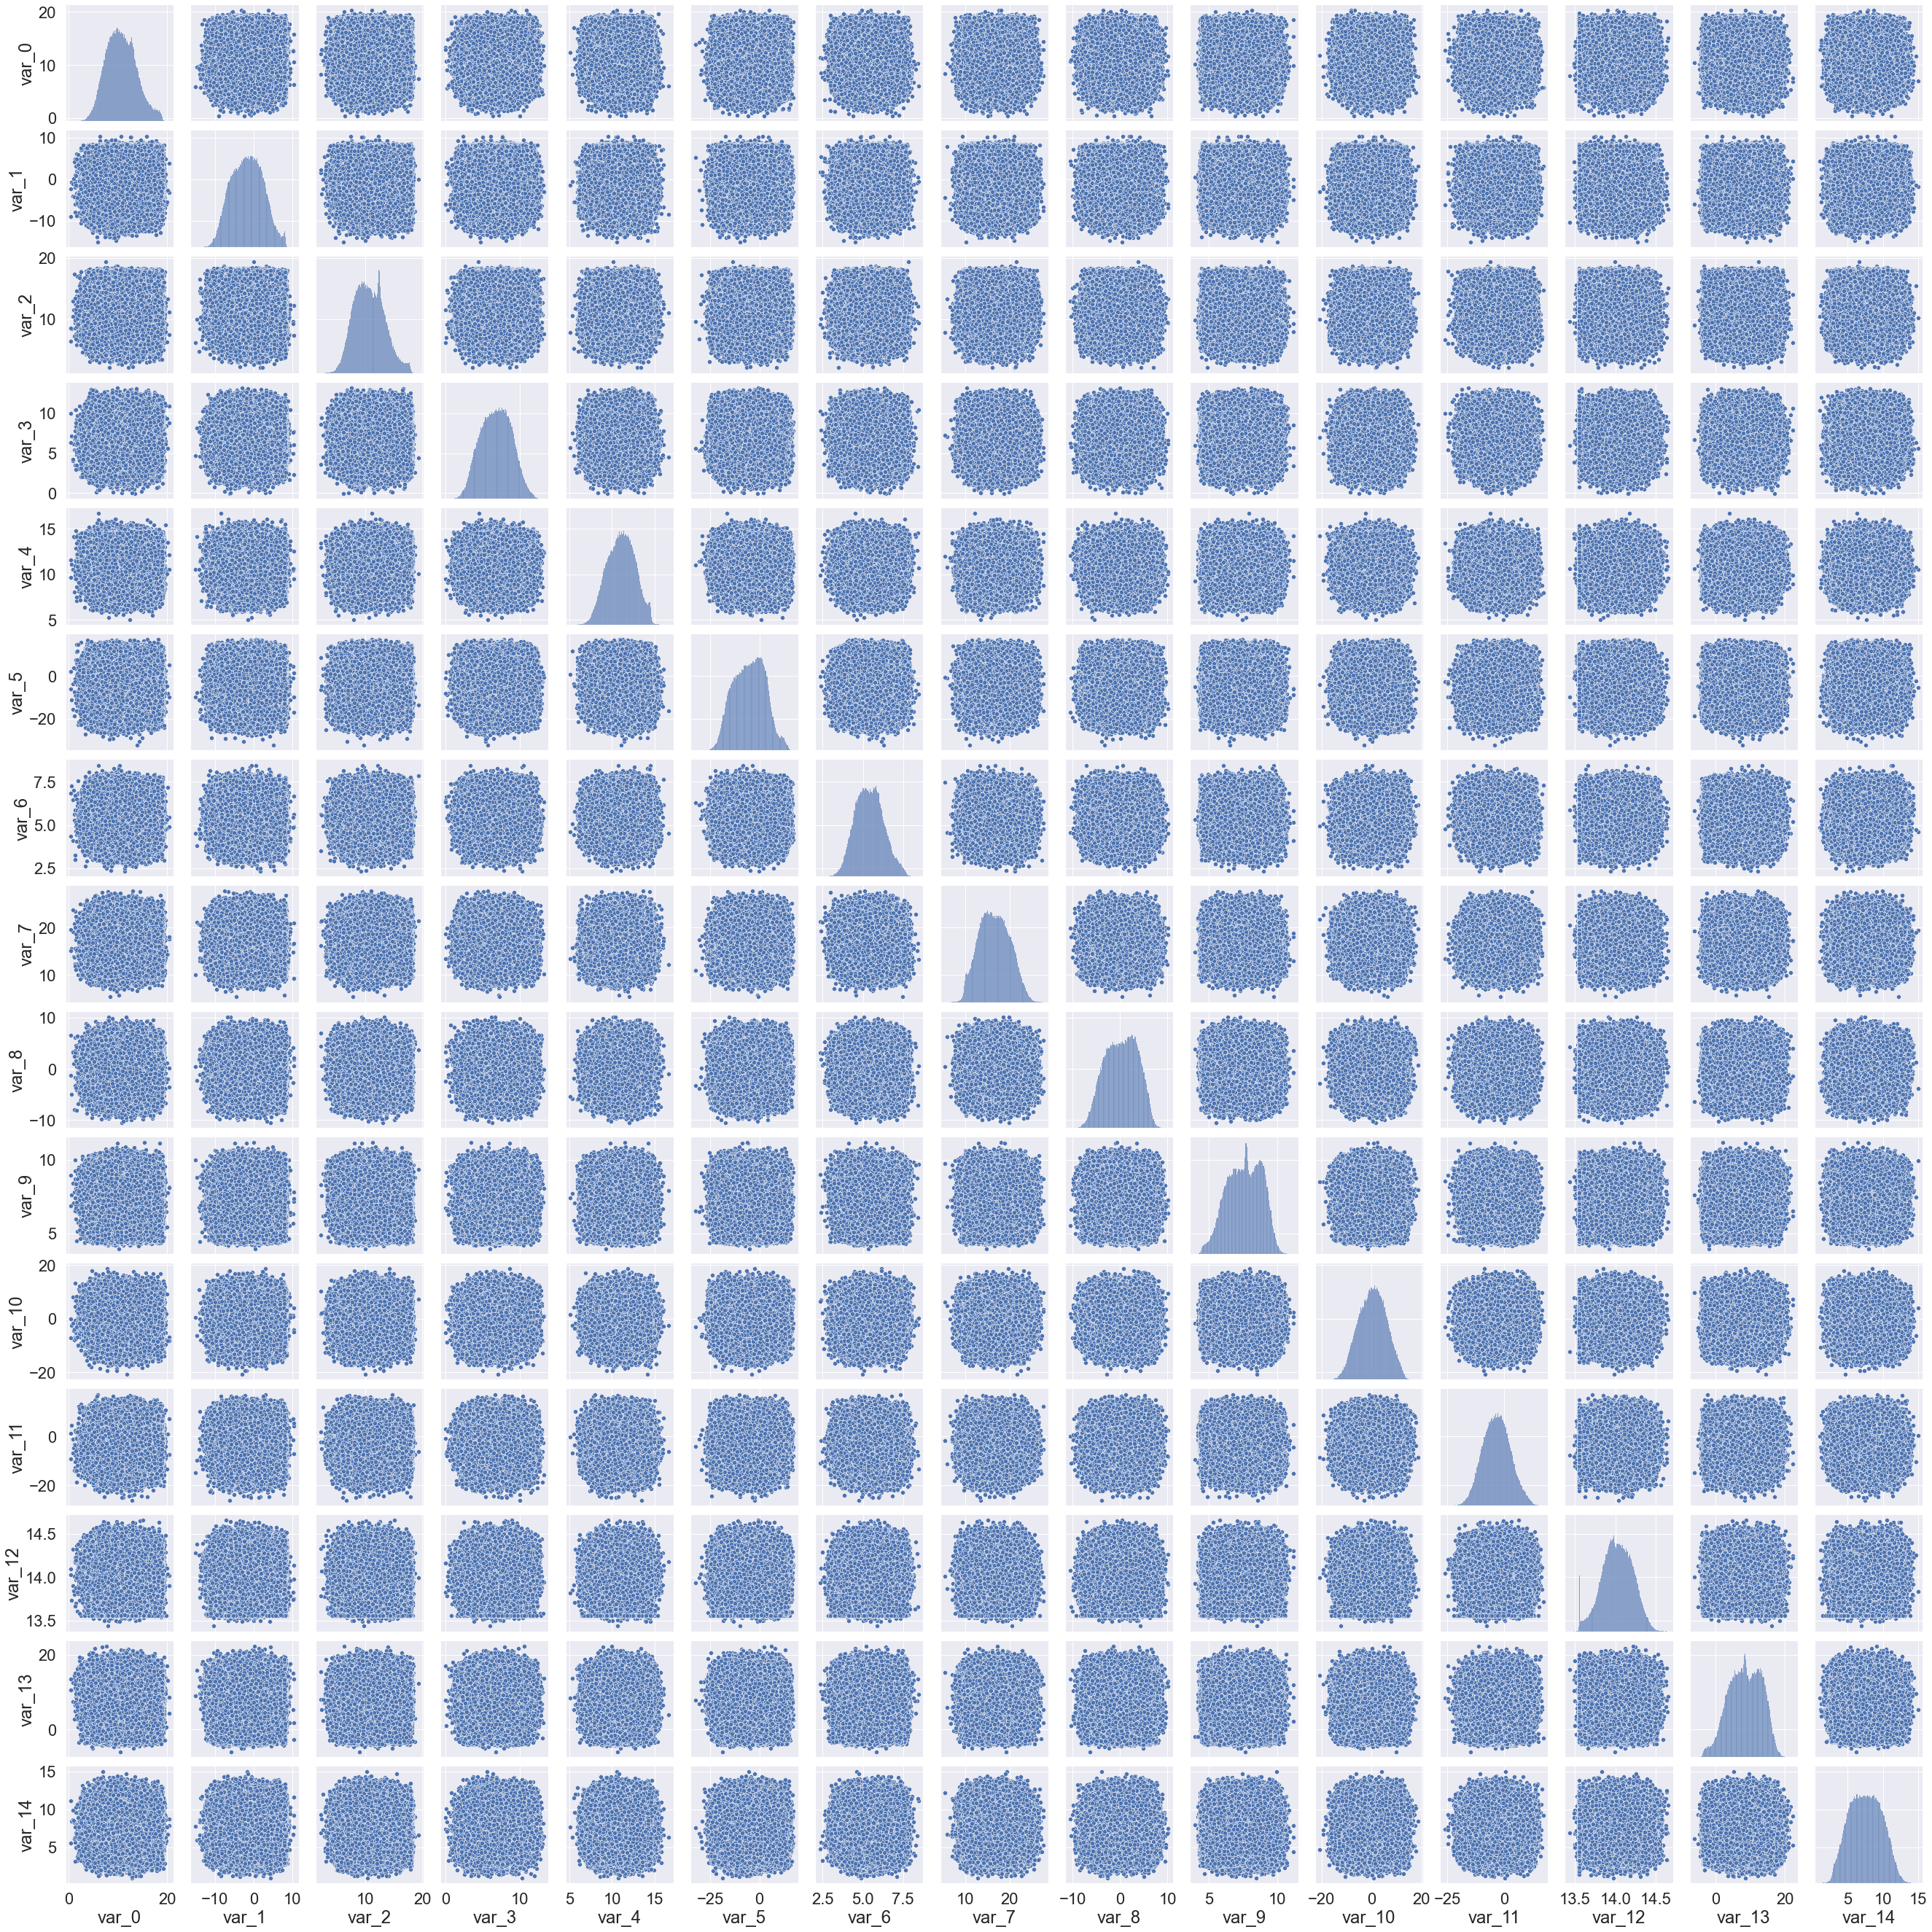

In [98]:
sns.pairplot(df_values.iloc[:,0:15])

# Analisis PCA   
    Debido a la cantidad de variables vamos a realizar una analisis pca para disminuirlo, se destaca que el dataset ya esta estandarizado son entre -1 y 1

In [51]:
from sklearn.linear_model import LogisticRegression

In [37]:
#Modelo de pca para disminuir de forma fija
pca = PCA(n_components=95)
principalComponents = pca.fit_transform(df_values)

In [38]:
#valido que haya quedado el dataframe en 95
principalDf = pd.DataFrame(data = principalComponents)
principalDf

0          1          2          3          4          5   \
0       -5.606470 -23.554378  -1.899627   5.221431   2.466692  -8.622219   
1       34.878029  11.469280  -3.759636 -19.274218  -8.543782   6.984875   
2       -4.790243  -0.334279  11.359216   8.533166   1.328605  -3.218192   
3       11.875373  14.050829  24.017663  -4.419438   0.372722   5.805433   
4       52.713137  24.315243   4.334397  23.857821 -17.868909  16.346273   
...           ...        ...        ...        ...        ...        ...   
199995 -10.724373  -1.958728  18.592047   0.293501  12.729472  -3.275409   
199996  14.450779  -0.234227 -16.938413  19.531464 -14.598686  -2.182703   
199997  36.842273   7.760125  30.232535  -9.884129   7.401158   4.182055   
199998  30.230916 -24.423585  25.553367  22.586017  -8.758021  -5.848026   
199999  -5.994883   7.697173  10.111728 -11.892965  -7.072838   8.854191   

               6          7          8          9          10         11  \
0        2.713672 -15.071467  11.416361   1.583198  -8.810932   0.802791   
1      -15.539956  -2.989644   8.117407  19.064876   4.790944 -11.514637   
2       22.019344  -1.662231  -4.055586   6.218505 -11.663853  -5.419932   
3       20.132807  12.235383  -1.442123 -14.343019   7.999074  22.746282   
4      -15.373926  11.752521 -18.458581 -14.795851  10.217799 -13.561330   
...           ...        ...        ...        ...        ...        ...   
199995  -4.491909   8.565970  -7.255836 -22.982364  11.463569   2.747134   
199996   1.678286   0.957621   8.627060  11.098156  11.079922   5.419798   
199997  -1.551211  -5.242874  -3.428821   2.323186  -4.165030   8.438969   
199998   1.114382   3.364017   8.653483  11.481789  14.330229 -14.654111   
199999  -8.481750   6.429207  -7.749452  -3.791273  -8.202191  14.542884   

               12         13         14         15         16         17  \
0        1.442527  12.481240  -6.771735 -15.692618 -14.051638   2.356081   
1       -7.972368 -16.213507   0.056052  -8.582946   8.299405 -14.261953   
2       -5.838414  -1.626920   4.860687 -10.977455  -4.695554 -14.016046   
3        4.943084   3.645761   5.697861  14.465563  10.924763   1.134793   
4        7.045395  -3.622225  -3.787465   3.065871  17.254870   4.513871   
...           ...        ...        ...        ...        ...        ...   
199995  12.789909  -2.202966   8.007721  -8.045988  14.143491   7.046154   
199996  -0.505081  20.488669  -1.921952   0.137363   9.530893   8.358172   
199997  -6.959152  -0.210225  -3.564730  -6.135744   2.410490  -0.056456   
199998   2.097107 -21.447404  17.216342   1.474306  -4.714850   8.180036   
199999  -7.622018   2.008813  14.443317   4.841757  -9.296564   9.599848   

               18         19         20         21         22         23  \
0      -13.960569   8.163807   0.767741   1.538613  -3.135693  -3.933108   
1       -0.660878   7.533681   2.166960  10.271363  -8.710163  10.308446   
2        3.591376  10.545358 -13.099281  -7.174804  -5.747035   7.937366   
3       -7.416931 -10.165116  -3.508487  -5.143386  -7.559733  -4.620905   
4       -8.433239 -18.403446  -0.628356  -2.573327   5.218333  -0.728139   
...           ...        ...        ...        ...        ...        ...   
199995  -3.119423  -2.431143   5.214408   6.909588  13.069989  -9.939086   
199996  -0.005521  -7.462128   3.647204 -11.779665  -0.170302   2.433719   
199997  -4.786483  -1.830241  -3.983782   0.929524 -10.870279   8.379483   
199998  14.504536  -7.254116   2.739062  -4.174516  -8.126602   3.639815   
199999   2.261300   4.606456   0.994076   9.471267   0.911664   5.094089   

               24         25         26         27         28         29  \
0       -5.044511  -2.789480   2.674547  -3.869741   0.281991  14.926494   
1       -3.677986  -7.131847 -10.316102   3.271516 -14.138802   1.303822   
2      -16.885733   9.355468  11.110952   5.885640  -0.872430   6.698709   
3       -5.540267   6.262459  -7.898422  -1.800483  -3.8164

In [39]:
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)

In [40]:
#Al tener tantas variables no puedo observar bien lo que esta pasando por eso aplico PCA por valor
pca.explained_variance_ratio_

array([0.07134872, 0.03102161, 0.0275696 , 0.02691158, 0.02489565,
       0.02287989, 0.02225093, 0.02105403, 0.02086593, 0.02017547,
       0.01843942, 0.01743735, 0.01699429, 0.0168076 , 0.01674814,
       0.01353783, 0.01311899, 0.01251764, 0.01231977, 0.01207323,
       0.0117257 , 0.01160495, 0.01146182, 0.01132444, 0.01120584,
       0.0110347 , 0.01073858, 0.01067919, 0.0104511 , 0.01043076,
       0.00997411, 0.00989095, 0.00983693, 0.00967726, 0.00961899,
       0.00960881, 0.00959017, 0.00947157, 0.0093434 , 0.00918017,
       0.00902137, 0.00899917, 0.00879426, 0.00868901, 0.00861314,
       0.008549  , 0.0084111 , 0.00791756, 0.00702962, 0.00700597,
       0.0060364 , 0.00592751, 0.00588658, 0.00571476, 0.00555798,
       0.00554081, 0.00548443, 0.0054596 , 0.00542672, 0.00537027,
       0.00518353, 0.00506213, 0.00502975, 0.00497329, 0.00482828,
       0.00471424, 0.00463555, 0.00462416, 0.00449779, 0.00431008,
       0.0042968 , 0.00417689, 0.00415227, 0.00391803, 0.00386

# Analisis PCA de .95 y Regresion
Se hace el pca de .95 para reducir al maximo los valores y que la varianza se retenga el 95% de la variable

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [66]:
#Cargo los datos de los dataframe
X=df_values
y=df["target"]

In [82]:
#Divido el dataframe en test y train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [83]:
scaler = StandardScaler()

In [84]:
# Fit on training set only.
scaler.fit(X_train)
# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [85]:
#Valido que este estandarizado
X_train

array([[-1.34280074,  1.98522682,  0.07887604, ...,  0.01705813,
         0.15836638,  0.05683518],
       [-0.20742762,  1.43222219, -0.8810405 , ...,  1.31158732,
        -1.12629007, -1.67761164],
       [ 0.27391916,  0.39489042,  1.51087647, ...,  0.62541729,
         1.09431944,  0.48083664],
       ...,
       [ 2.01053894,  0.65170173, -0.18240189, ..., -1.02752   ,
        -0.81398468, -0.703597  ],
       [-0.23070211,  2.24391699,  0.8310605 , ..., -0.91928032,
         1.82493604,  0.06414952],
       [ 0.30576499, -0.44088353, -0.64708575, ...,  1.795623  ,
        -1.1567767 ,  0.33426231]])

In [86]:
#Aplico el PCA
pca = PCA(.95)
pca.fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

In [87]:
#Aplico regresion lineal 
logisticRegr = LogisticRegression(solver = 'lbfgs')

In [90]:
#Hago el fit del modelo
logisticRegr.fit(X_train, y_train)

LogisticRegression()

In [103]:
# Predict for One Observation (image)
print(logisticRegr.predict(X_test[0:100]), y_test[0:100])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0] ID_code
train_119737    0
train_72272     0
train_158154    0
train_65426     0
train_30074     1
               ..
train_182091    1
train_31929     0
train_78446     0
train_145114    1
train_96761     0
Name: target, Length: 100, dtype: int64


In [92]:
#Calulo el score del modelo 
logisticRegr.score(X_test, y_test)

0.9132878787878788

In [104]:
#Valido la cantidad de componentes
pca.n_components_

190